# **Lab 4 (Assignment)**


## Assignment 1

In [4]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


data = pd.read_csv("//content/Gender_Classification_Data.csv")

print("Dataset Columns:")
print(data.columns)
print("\nFirst 5 rows:")
print(data.head())



#  Identify Target Column
target_col = None
for col in data.columns:
    if data[col].dtype == 'object':
        target_col = col
        break

if target_col is None:
    raise ValueError("No categorical target column found!")

print(f"\nTarget column detected: {target_col}")



#  Encode Target Variable
data[target_col] = data[target_col].map({
    'Male': 1, 'Female': 0,
    'male': 1, 'female': 0
})

# Features and labels
X = data.drop(target_col, axis=1)
y = data[target_col]


# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

#  Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


# Confusion Matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("\nTraining Confusion Matrix:")
print(cm_train)

print("\nTest Confusion Matrix:")
print(cm_test)

# Performance Metrics
def print_metrics(y_true, y_pred, name):
    print(f"\n{name} Performance Metrics")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))

print_metrics(y_train, y_train_pred, "Training")
print_metrics(y_test, y_test_pred, "Test")


# Learning Outcome Inference
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nModel Learning Outcome:")

if train_f1 - test_f1 > 0.1:
    print("OVERFITTING: High training performance, lower test performance.")
elif abs(train_f1 - test_f1) < 0.05:
    print("REGULAR FITTING: Good generalization.")
else:
    print("UNDERFITTING: Model is too simple.")


Dataset Columns:
Index(['gender', 'height', 'weight', 'age'], dtype='object')

First 5 rows:
   gender      height     weight  age
0  female  166.835558  64.238722   38
1  female  166.321934  67.165489   65
2    male  193.424782  89.342636   67
3  female  167.027904  67.637666   55
4    male  191.822253  93.985117   29

Target column detected: gender

Training Confusion Matrix:
[[3704   46]
 [  74 3676]]

Test Confusion Matrix:
[[1232   18]
 [  21 1229]]

Training Performance Metrics
Accuracy : 0.984
Precision: 0.9876410531972059
Recall   : 0.9802666666666666
F1-score : 0.9839400428265525

Test Performance Metrics
Accuracy : 0.9844
Precision: 0.9855653568564555
Recall   : 0.9832
F1-score : 0.9843812575090108

Model Learning Outcome:
REGULAR FITTING: Good generalization.


## Assignment-2

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_excel("/content/data.xlsx")

X = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = data['Payment (Rs)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

train_mse, train_rmse, train_mape, train_r2 = regression_metrics(
    y_train, y_train_pred
)
test_mse, test_rmse, test_mape, test_r2 = regression_metrics(
    y_test, y_test_pred
)

print("Training Data")
print("MSE :", train_mse)
print("RMSE:", train_rmse)
print("MAPE:", train_mape)
print("R2  :", train_r2)

print("\nTest Data")
print("MSE :", test_mse)
print("RMSE:", test_rmse)
print("MAPE:", test_mape)
print("R2  :", test_r2)

if abs(train_r2 - test_r2) < 0.05:
    print("\nModel shows regular fitting")
elif train_r2 > test_r2:
    print("\nModel shows overfitting")
else:
    print("\nModel shows underfitting")


Training Data
MSE : 2.0771834578619558e-27
RMSE: 4.5576128157863035e-14
MAPE: 1.7225278442669093e-14
R2  : 1.0

Test Data
MSE : 1.5348077771980006e-26
RMSE: 1.2388735920980804e-13
MAPE: 6.708279181313804e-14
R2  : 1.0

Model shows regular fitting


## Assignment 3

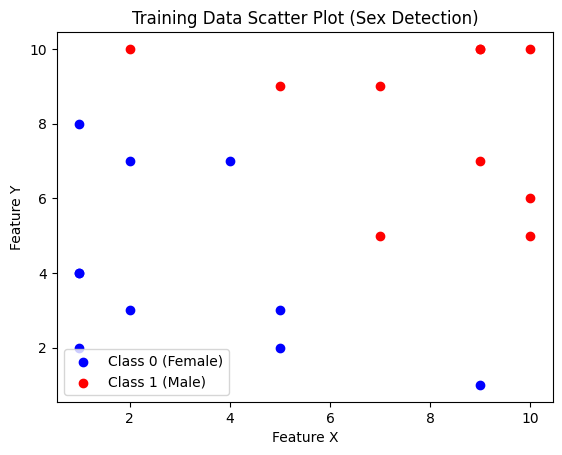

     X   Y  Class
0   10   5      1
1    5   2      0
2    1   4      0
3    2   7      0
4   10   6      1
5    1   4      0
6    2  10      1
7    9   7      1
8   10  10      1
9    1   2      0
10   9  10      1
11   7   5      1
12   5   3      0
13   4   7      0
14   1   8      0
15   5   9      1
16   7   9      1
17   9  10      1
18   2   3      0
19   9   1      0


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10)

X = np.random.randint(1, 11, 20)
Y = np.random.randint(1, 11, 20)

labels = np.where(X + Y <= 11, 0, 1)

data = pd.DataFrame({
    "X": X,
    "Y": Y,
    "Class": labels
})

plt.figure()
plt.scatter(data[data["Class"] == 0]["X"],
            data[data["Class"] == 0]["Y"],
            color="blue", label="Class 0 (Female)")

plt.scatter(data[data["Class"] == 1]["X"],
            data[data["Class"] == 1]["Y"],
            color="red", label="Class 1 (Male)")

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Training Data Scatter Plot (Sex Detection)")
plt.legend()
plt.show()

print(data)


## Assignment 4


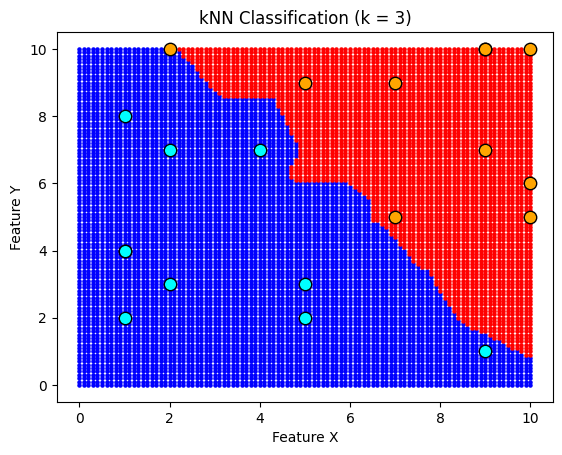

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(10)

X_train = np.random.randint(1, 11, 20)
Y_train = np.random.randint(1, 11, 20)
y_train = np.where(X_train + Y_train <= 11, 0, 1)

train_data = np.column_stack((X_train, Y_train))

x_vals = np.arange(0, 10.1, 0.1)
y_vals = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_vals, y_vals)

X_test = np.c_[xx.ravel(), yy.ravel()]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, y_train)

y_test_pred = knn.predict(X_test)

plt.figure()
plt.scatter(X_test[y_test_pred == 0, 0],
            X_test[y_test_pred == 0, 1],
            color="blue", s=5)

plt.scatter(X_test[y_test_pred == 1, 0],
            X_test[y_test_pred == 1, 1],
            color="red", s=5)

plt.scatter(train_data[y_train == 0, 0],
            train_data[y_train == 0, 1],
            color="cyan", edgecolor="black", s=80)

plt.scatter(train_data[y_train == 1, 0],
            train_data[y_train == 1, 1],
            color="orange", edgecolor="black", s=80)

plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("kNN Classification (k = 3)")
plt.show()


## Assignment 5


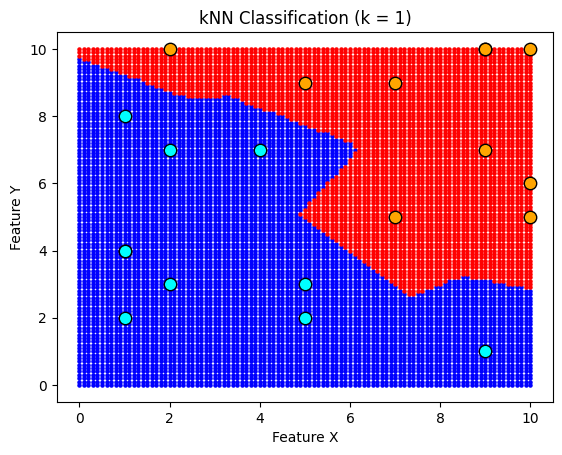

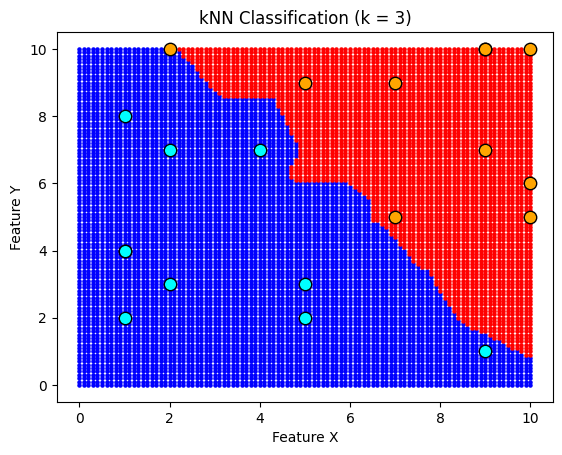

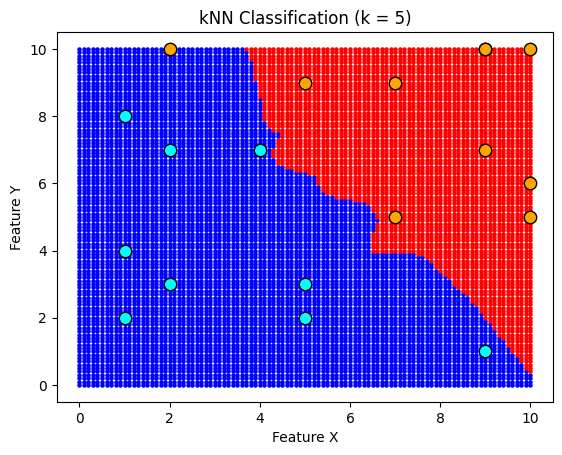

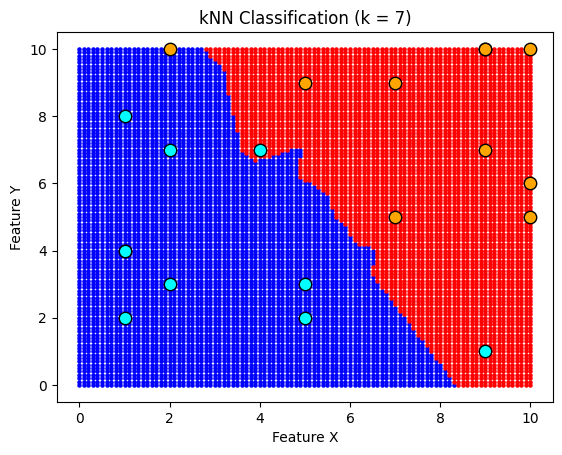

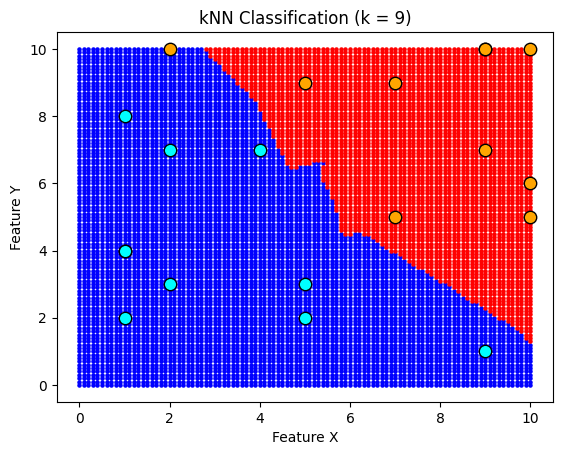

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(10)

X_train = np.random.randint(1, 11, 20)
Y_train = np.random.randint(1, 11, 20)
y_train = np.where(X_train + Y_train <= 11, 0, 1)

train_data = np.column_stack((X_train, Y_train))

x_vals = np.arange(0, 10.1, 0.1)
y_vals = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_vals, y_vals)
X_test = np.c_[xx.ravel(), yy.ravel()]

k_values = [1, 3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, y_train)

    y_test_pred = knn.predict(X_test)

    plt.figure()
    plt.scatter(X_test[y_test_pred == 0, 0],
                X_test[y_test_pred == 0, 1],
                color="blue", s=5)
    plt.scatter(X_test[y_test_pred == 1, 0],
                X_test[y_test_pred == 1, 1],
                color="red", s=5)

    plt.scatter(train_data[y_train == 0, 0],
                train_data[y_train == 0, 1],
                color="cyan", edgecolor="black", s=80)
    plt.scatter(train_data[y_train == 1, 0],
                train_data[y_train == 1, 1],
                color="orange", edgecolor="black", s=80)

    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"kNN Classification (k = {k})")
    plt.show()


## Assignment 6


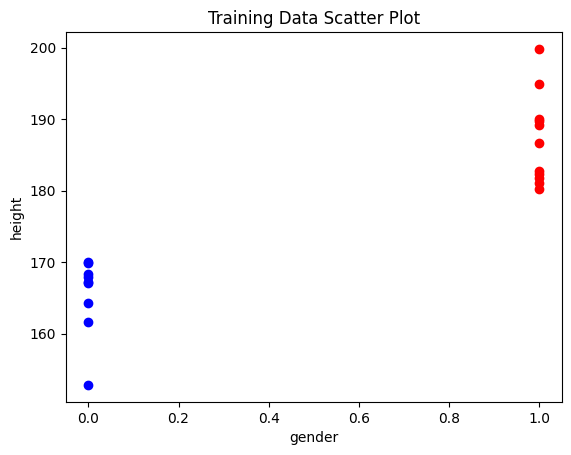

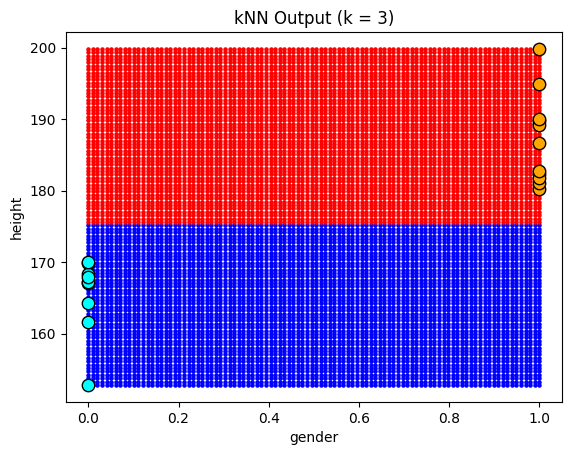

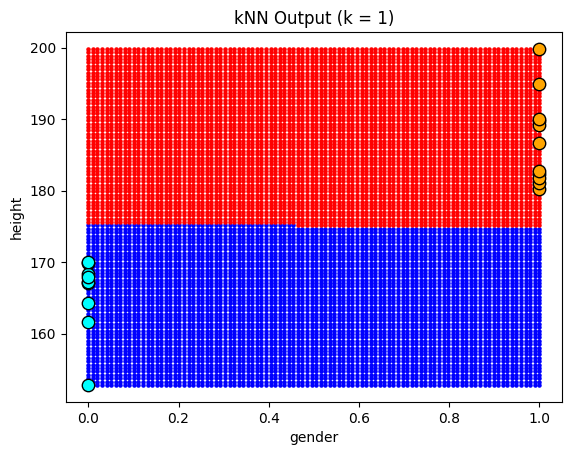

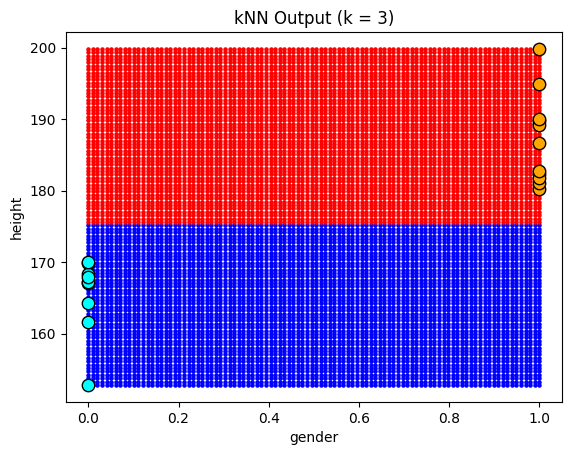

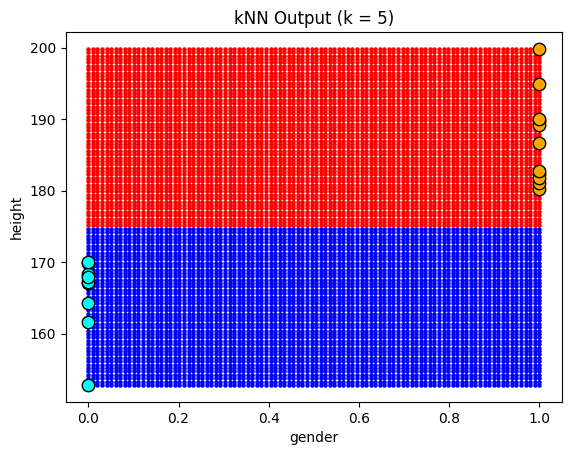

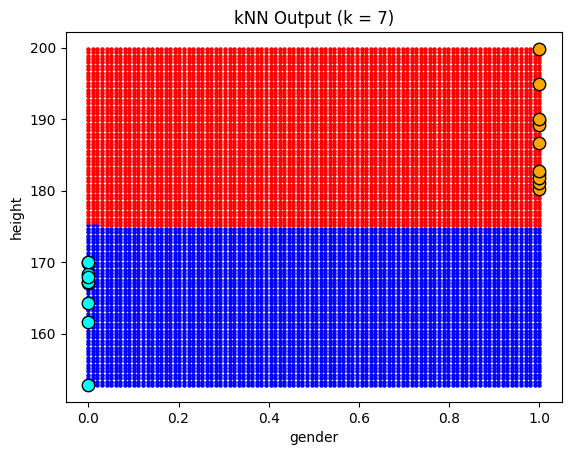

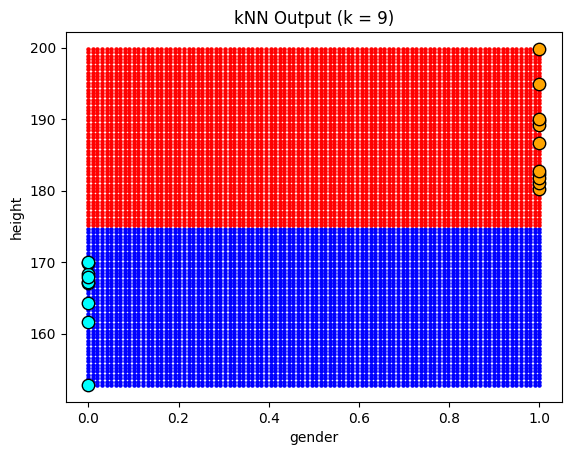

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("/content/Gender_Classification_Data.csv")

target = None
for c in data.columns:
    if data[c].dtype == "object":
        target = c
        break

data[target] = data[target].map({"Male": 1, "Female": 0, "male": 1, "female": 0})

features = list(data.columns[:2])
X = data[features].values
y = data[target].values

np.random.seed(10)
idx = np.random.choice(len(X), 20, replace=False)
X_train = X[idx]
y_train = y[idx]

plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="blue")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="red")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Training Data Scatter Plot")
plt.show()

x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

X_test = np.c_[xx.ravel(), yy.ravel()]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

plt.figure()
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], color="blue", s=5)
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], color="red", s=5)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="cyan", edgecolor="black", s=80)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="orange", edgecolor="black", s=80)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("kNN Output (k = 3)")
plt.show()

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    plt.figure()
    plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], color="blue", s=5)
    plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], color="red", s=5)
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="cyan", edgecolor="black", s=80)
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="orange", edgecolor="black", s=80)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f"kNN Output (k = {k})")
    plt.show()


## Assignment 7


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("/content/Gender_Classification_Data.csv")

target = None
for c in data.columns:
    if data[c].dtype == "object":
        target = c
        break

data[target] = data[target].map({"Male": 1, "Female": 0, "male": 1, "female": 0})

features = list(data.columns[:2])
X = data[features].values
y = data[target].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

param_grid = {"n_neighbors": list(range(1, 21))}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")
grid.fit(X, y)

print("Best k value:", grid.best_params_["n_neighbors"])
print("Best cross-validation accuracy:", grid.best_score_)


Best k value: 1
Best cross-validation accuracy: 1.0
